# EasyVisa Project by Meng Zhang

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [1]:
# Installing the libraries with the specified version.
# !pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.2.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

## Reading in data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ensemble Technique/Project 5/EasyVisa.csv')

## Data Overview

- Observations
- Sanity checks

In [5]:
# Check the first few rows in the dataset.
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [6]:
# Check the last few rows in the dataset.
df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


In [7]:
# Check the shape of the dataset.
df.shape

(25480, 12)

- The dataset has 25480 rows and 12 columns.

In [8]:
# Check the data type of the columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


- There are 9 columns of data in the object type, 2 columns of data in the integer type, and 1 column of data in the float type.
- The object type columns are case_id, continent, education_of_employee, has_job_experience, requires_job_training, region_of_employment, unit_of_wage, full_time_position, case_status.
- The integer type columns are no_of_employment and yr_of_estab.
- The float type column is prevailing_wage.

### Convert object type to category type.

In [9]:
cols = df.select_dtypes(['object'])
cols.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [10]:
for i in cols.columns:
  df[i] = df[i].astype('category')

In [11]:
# Check the data type again.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 2.0 MB


In [12]:
# Check the statistics of the dataset
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.04321,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Among the 25480 cases, applications for employees from Asia are dominant. Most application cases are for employees holding a Bachelor's degree.
- In more than half of the applications, employees had job experience before and most of the employees don not need training.
- For employer's company, the largest company has more than 602,000 employees. But the company with negative values of employee number is strange, which needs check further.
- For employer's company, the oldest company was established in 1800 and the newest company was established in 2016.
- Among all the application cases, companies in the Northeast region have the largest number of applications.
- The mean prevailing wage for all applications is $74455, and Most of the jobs are full-time positions.
- Among all the cases, 17018 cases are certified, and the rest are denied.

In [13]:
# Check the case_id column again
df['case_id'].nunique()

25480

- Since the case id is unique for all rows, we can drop this data column.

In [14]:
# Drop case_id column.
df.drop(['case_id'], axis=1, inplace=True)

# Check the data again.
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [15]:
# Check missing data
df.isnull().sum()

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

- There are no missing data in the dataset.

In [16]:
# Check the unique values for the categories.
cols_cat = df.select_dtypes(['category'])
for i in cols_cat.columns:
    print('Unique values in',i, 'are:')
    print(cols_cat[i].value_counts())
    print('#'*50)

Unique values in continent are:
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
##################################################
Unique values in education_of_employee are:
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
##################################################
Unique values in has_job_experience are:
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
##################################################
Unique values in requires_job_training are:
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
##################################################
Unique values in region_of_employment are:
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: count, dtype: int64
############

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

## Univariate analysis

In [17]:
# Define a function to plot histgram and box plots.
def histogram_boxplot(data, feature, figsize=(10, 6), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [18]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

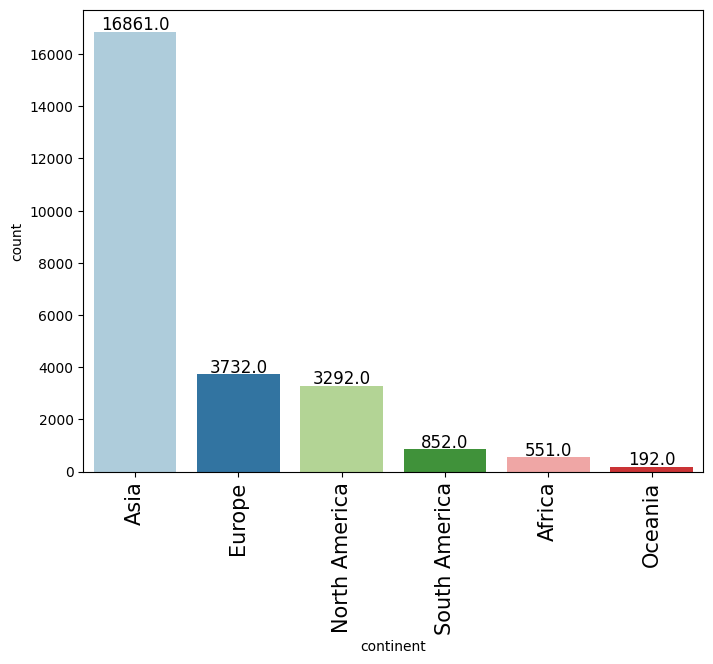

In [19]:
# Check for continent
labeled_barplot(df, 'continent')

- Employees from Asia consist of the majority of employees who applied for the visa.
- Employees from Europe and North America rank the second and third in terms of the number of applicants in each continent.


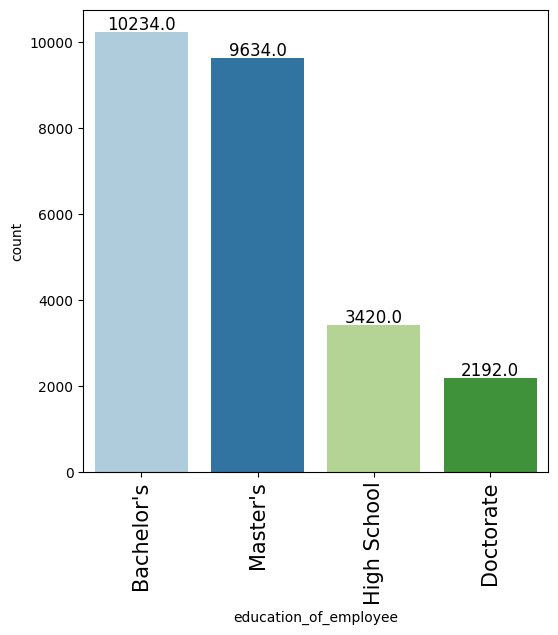

In [20]:
# Check for education_of_employee
labeled_barplot(df, 'education_of_employee')

- Applicants who hold a Bachelor's degree contribute the most to the number of applications.
- Applicants who hold a Master's degree contribute the second most to the number of applications.
- Less than 10% of the applicants have a Doctorate degree.

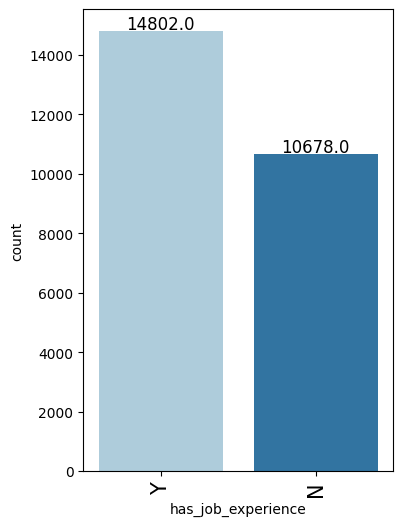

In [21]:
# Check for has_job_experience
labeled_barplot(df, 'has_job_experience')

- The number of applicants who have job experience is more than the number of applicants who don't have job experience.

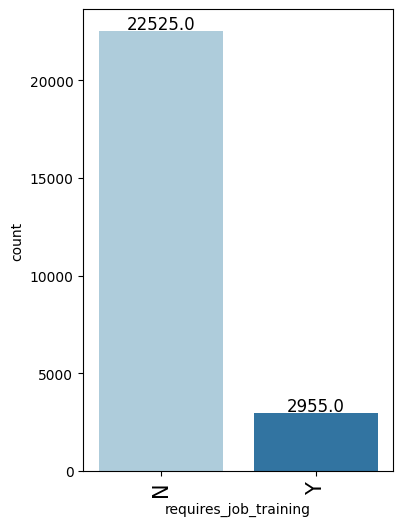

In [22]:
# Check for requires_job_training
labeled_barplot(df, 'requires_job_training')

- The majority of applicants do not need job training.

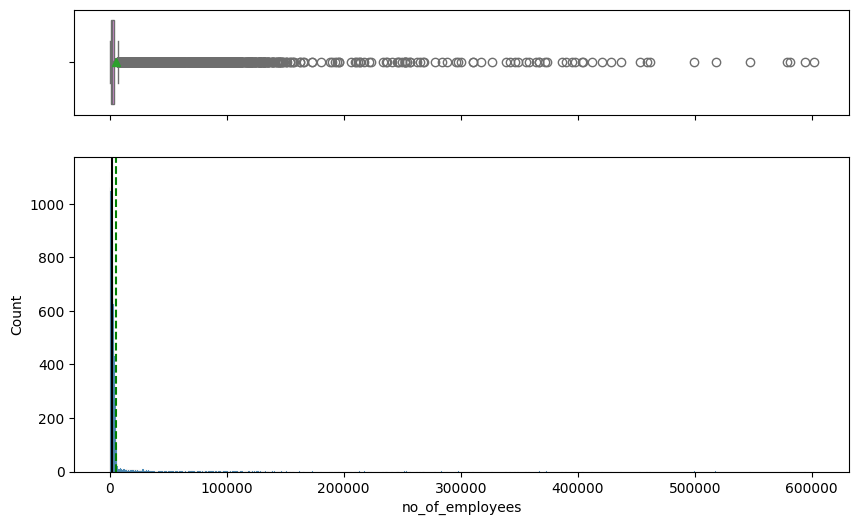

In [23]:
# Check for no_of_employees
histogram_boxplot(df, 'no_of_employees')

- The distribution of number of employees is extremely right-skewed.
- Most of the companies have small number of employees. There are many outliers for the employee number.

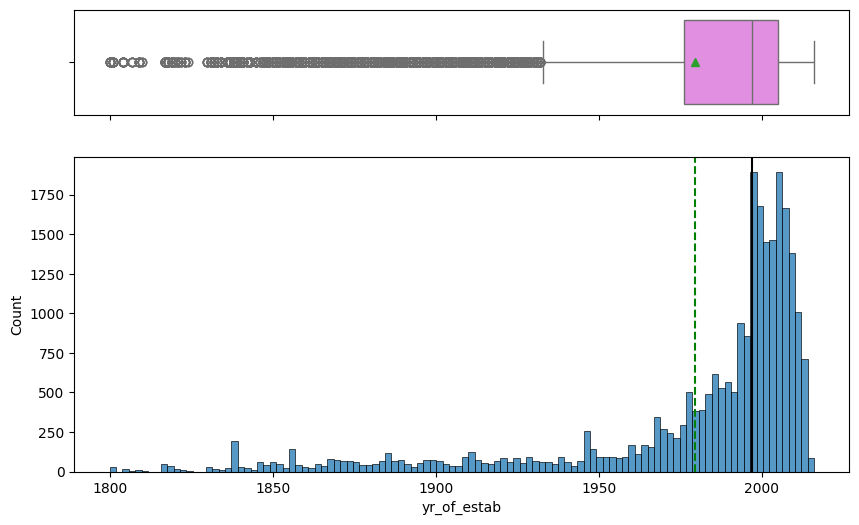

In [24]:
# Check for yr_of_estab
histogram_boxplot(df, 'yr_of_estab')

- The distribution of year of established is highly left-skewed.
- Around 75% of the companies were established after the year 1975. Around 50% of the companies were established after the year 1995.



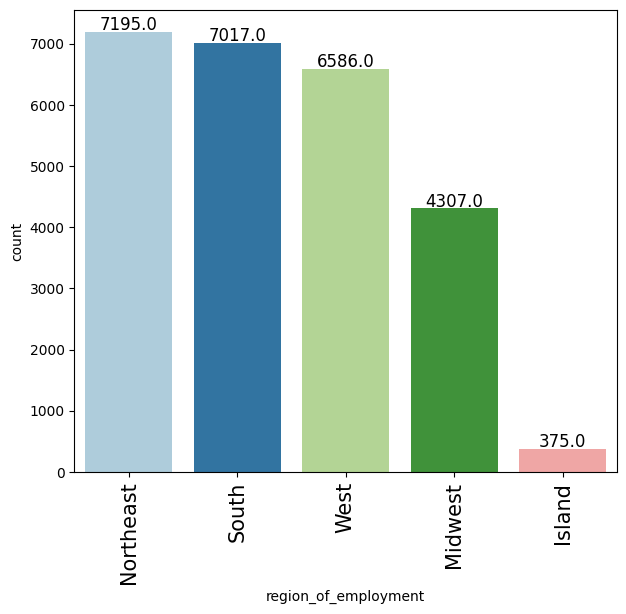

In [25]:
# Check for region_of_employment
labeled_barplot(df, 'region_of_employment')

- Northeast, South, and West rank the top three regions of employment in terms of the number of employees who applied the visa.
- Island has the least number of applicants.

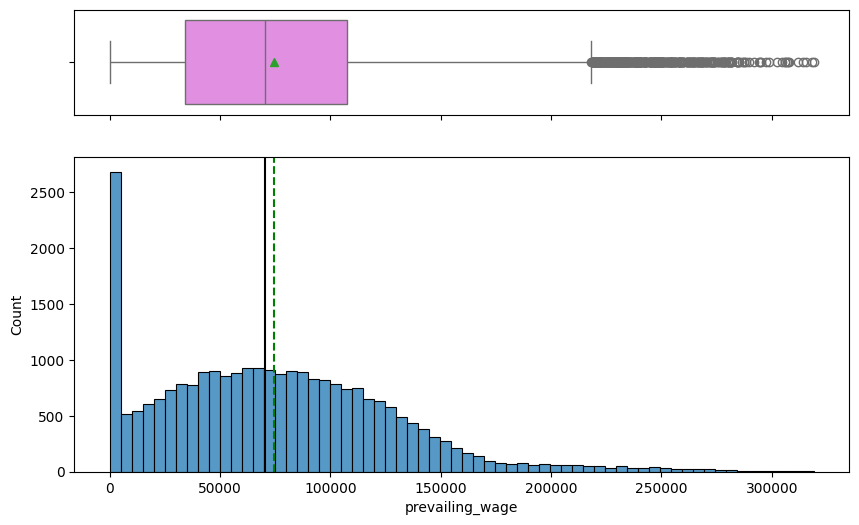

In [26]:
# Check for prevailing_wage
histogram_boxplot(df, 'prevailing_wage')

- The distribution of prevailing wage is right-skewed.
- A number of visa applicants have wage lower than \$5000.
- The median and mean prevailing wages are \$70000 and \$75000, respectively.
- There are a few outliers in the data.


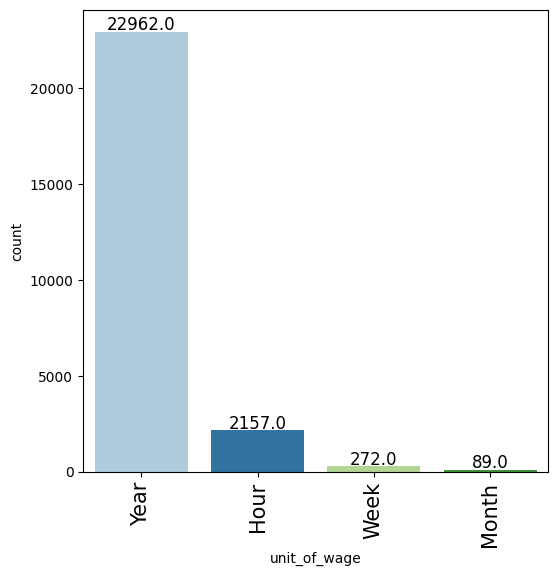

In [27]:
# Check for unit_of_wage
labeled_barplot(df, 'unit_of_wage')

- The majority of visa applicants are offered annual-based wage jobs.

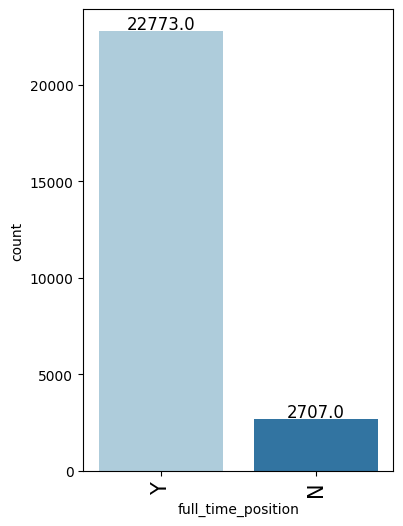

In [28]:
# Check for full_time_position
labeled_barplot(df, 'full_time_position')

- The majority of visa applicants have full time position.

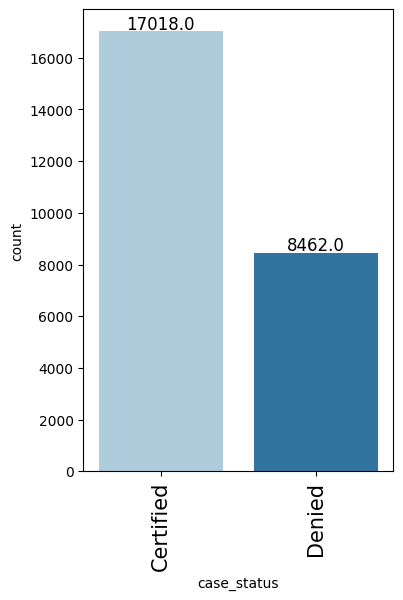

In [29]:
# Check for case_status
labeled_barplot(df, 'case_status')

- The number of certified applications is larger than denied applications.

## Bivariate analysis

<Axes: >

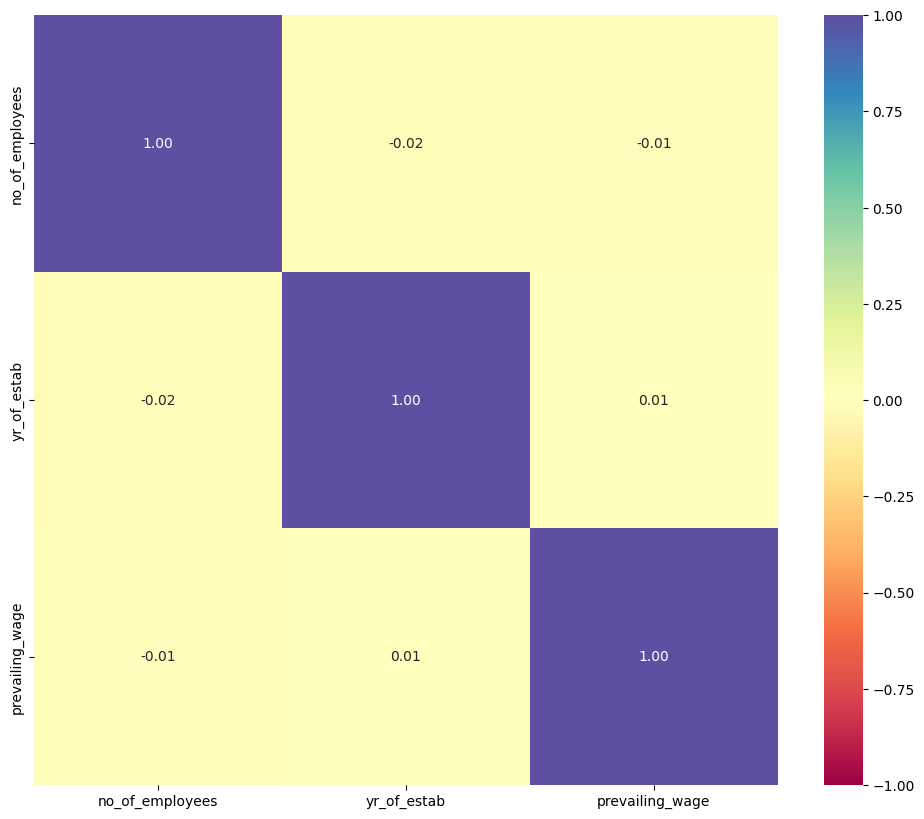

In [30]:
# Check the correlations between numerical variables
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, fmt='.2f', cmap='Spectral')

- The numerical variables have no correlations in the dataset.

In [31]:
# function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


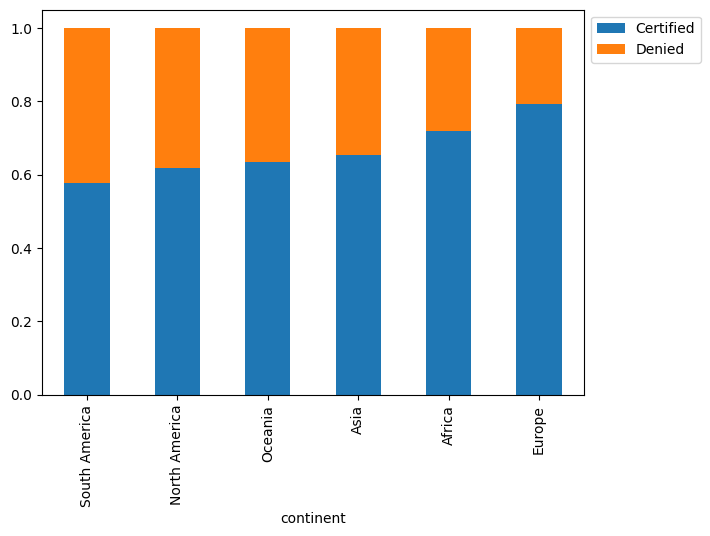

In [32]:
# Case status VS continent
stacked_barplot(df, 'continent', 'case_status')

- In terms of the number of denied case, Asia has the most cases.
- In terms of the fraction of denied cases in all cases, South America has highest denied fraction compared to other continents, and Europe has the least denied fraction.

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


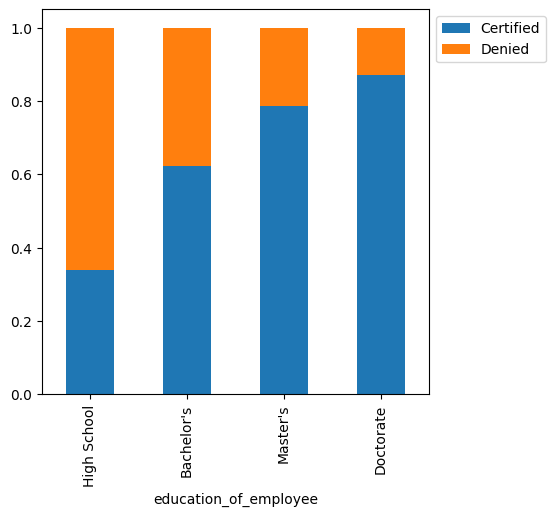

In [33]:
# Case status VS education_of_employee
stacked_barplot(df, 'education_of_employee', 'case_status')

- The higher the education of employee, the lower the chances of application being denied.

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


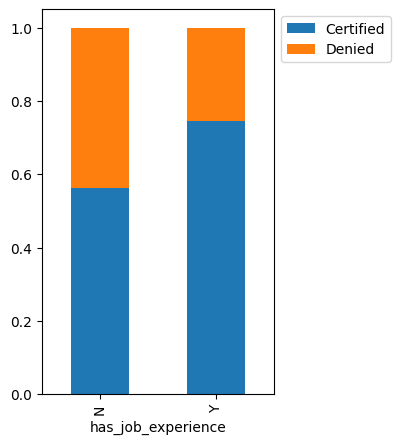

In [34]:
# Case status VS has_job_experience
stacked_barplot(df, 'has_job_experience', 'case_status')

- Having no job experience tends to increase the chances of getting denied application.

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


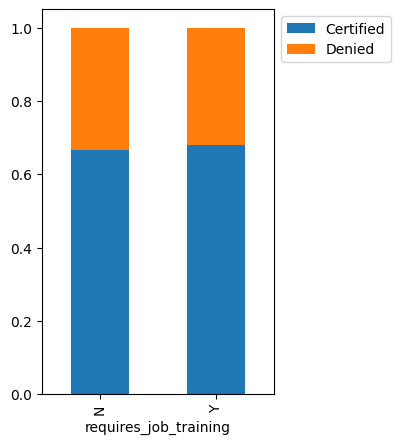

In [35]:
# Case status VS requires_job_training
stacked_barplot(df, 'requires_job_training', 'case_status')

- Whether requiring the job training seems not to impact the case status.

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


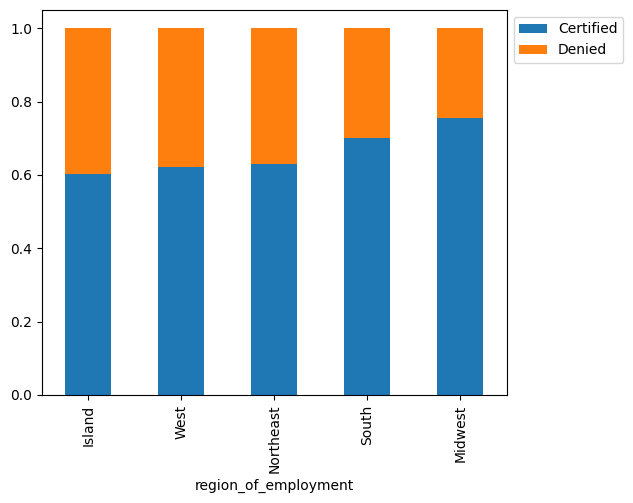

In [36]:
# Case status VS region_of_employment
stacked_barplot(df, 'region_of_employment', 'case_status')

- Employment from Island, West, and Northeast tend to have higher denied chances than South and Midwest regions.

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


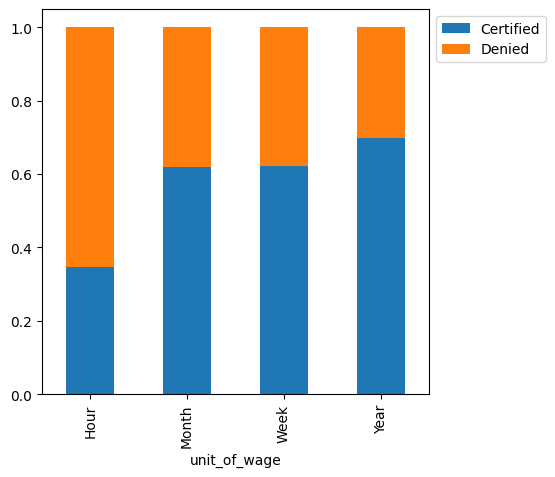

In [37]:
# Case status VS unit_of_wage
stacked_barplot(df, 'unit_of_wage', 'case_status')

- Positions with houtly wage tend to have higher denied chances than other types of positions.

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


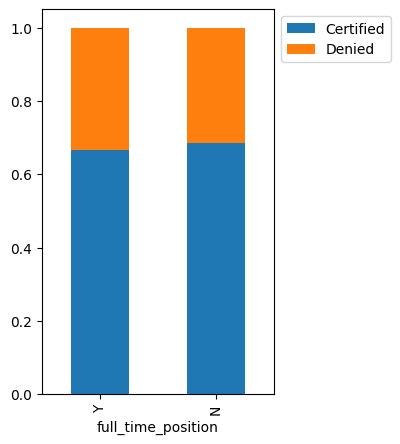

In [38]:
# Case status VS full_time_position
stacked_barplot(df, 'full_time_position', 'case_status')

- The case status does not differ significantly between full-time job and part-time job.

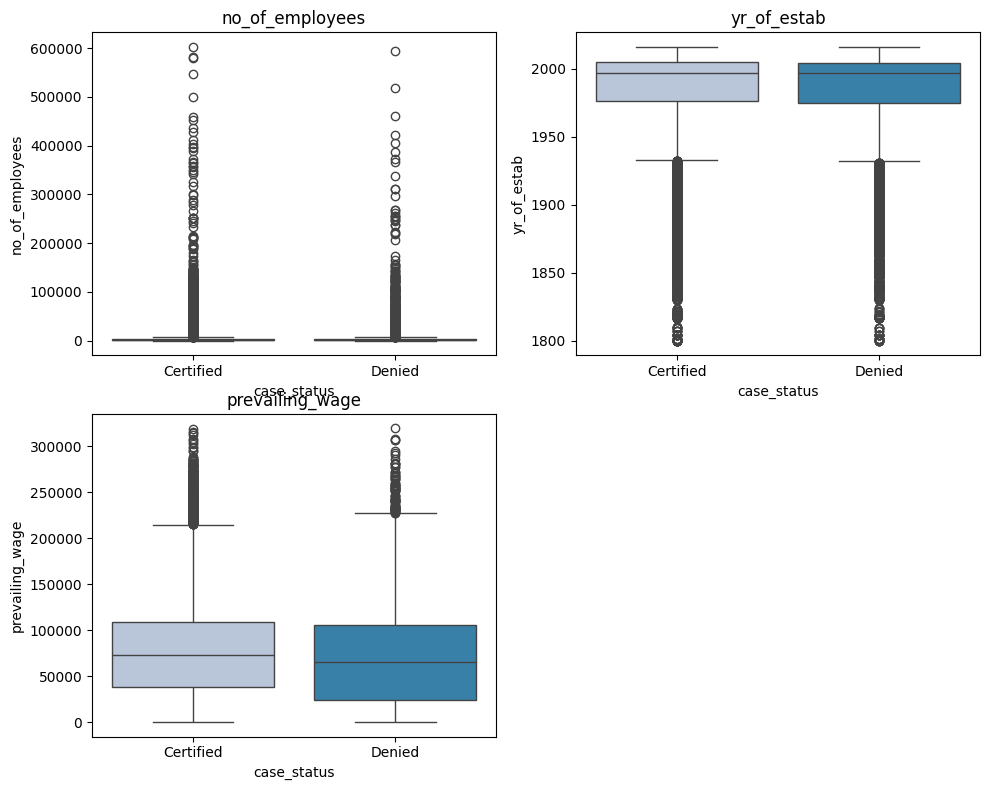

In [39]:
# Case status VS no_of_employees, yr_of_estab, prevailing_wage
cols = df[['no_of_employees','yr_of_estab','prevailing_wage']].columns.tolist()
plt.figure(figsize=(10,8))

for i, variable in enumerate(cols):
                     plt.subplot(2,2,i+1)
                     sns.boxplot(x=df["case_status"],y=df[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

- Number of employees and company established years show little difference betwen certified and denied cases.
- The lower quartile, median, and higher quartile values of prevailing wage is lower for denied cases than certified cases.

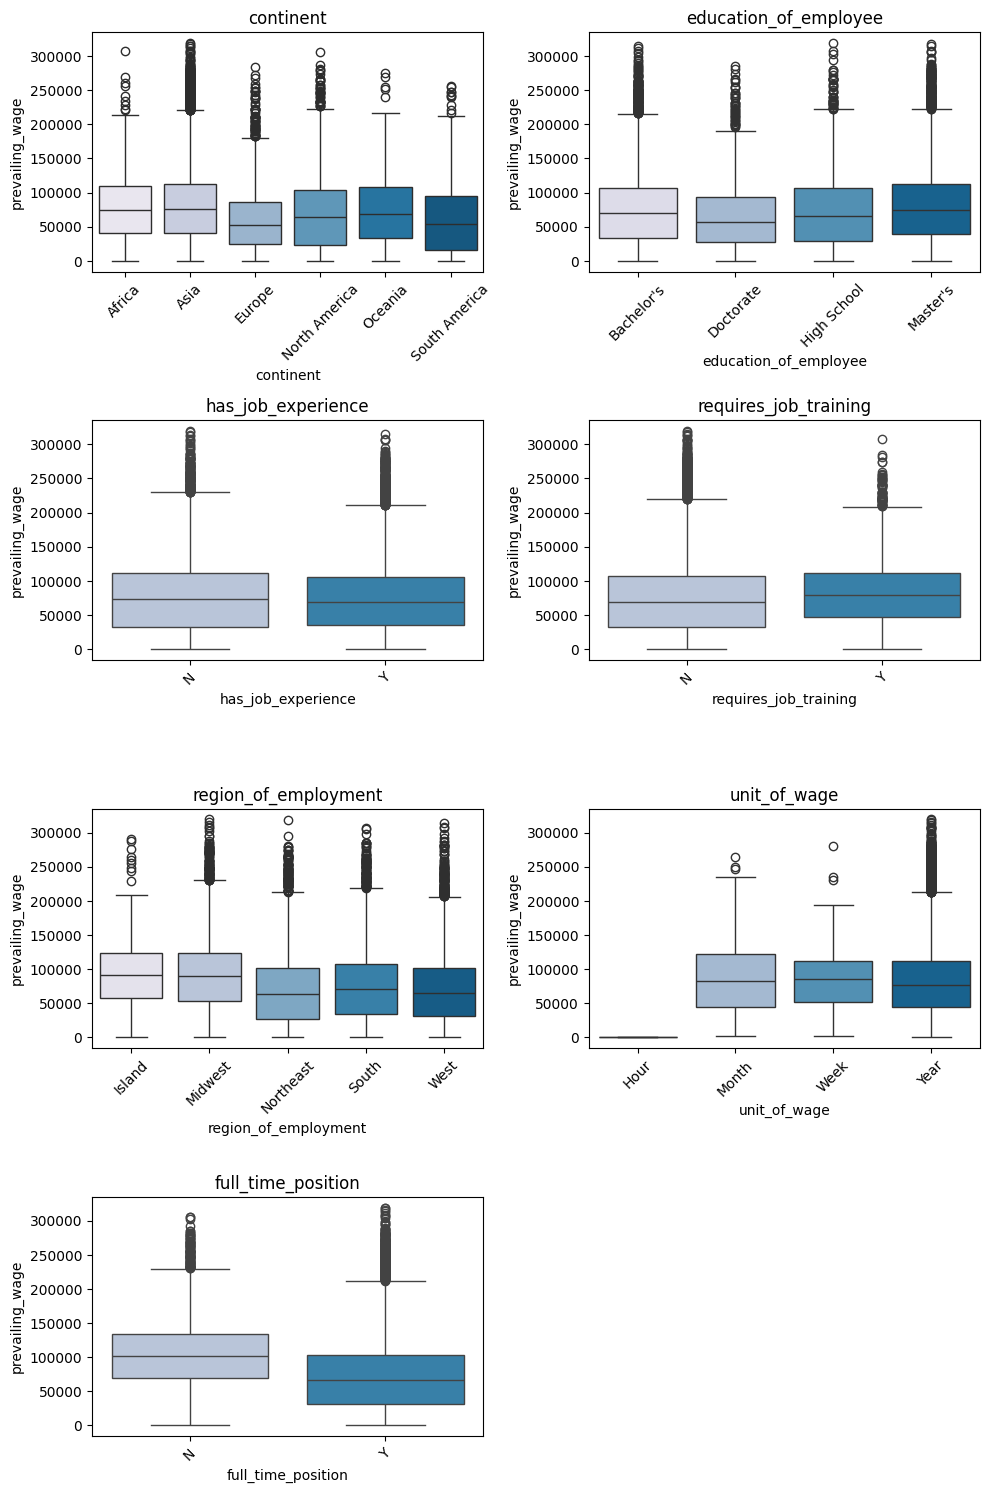

In [40]:
# Prevailing_wage VS continent, education_of_employee, has_job_experience, requires_job_training,
# region_of_employment, unit_of_wage, full_time_position
cols = df[['continent','education_of_employee','has_job_experience','requires_job_training',
           'region_of_employment','unit_of_wage','full_time_position']].columns.tolist()
plt.figure(figsize=(10,15))

for i, variable in enumerate(cols):
                     plt.subplot(4,2,i+1)
                     sns.boxplot(x=df[variable],y=df['prevailing_wage'],palette="PuBu")
                     plt.tight_layout()
                     plt.xticks(rotation=45)
                     plt.title(variable)
plt.show()

- Empolyees from South America tend to have lower 25% percentile and median prevailing wage than other continents. Employees from Asia tend to have higher 75% percentile wage than other continents.
- Employees with a Doctorate degree have lower 25% and 75% percentile and median values of prevailing wages than other employees.
- The interquartile range of wages for employees having job experience is slightly smaller than employees without job experience.
- The 25% and 75% percentile and median values of wage for jobs requiring training is higher than jobs do not need training.
- The 25% and 75% percentile and median values of wage for jobs at island and in midwest are higher than other regions. The Northeast region has the lower wages.
- The prevailing wages do not differ significantly with each other for the wage unit except for the hourly wage.
- The prevailing wage for full-time positions is higher than part-time positions in terms of the 25% and 75% percentile and median values of wages.



**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


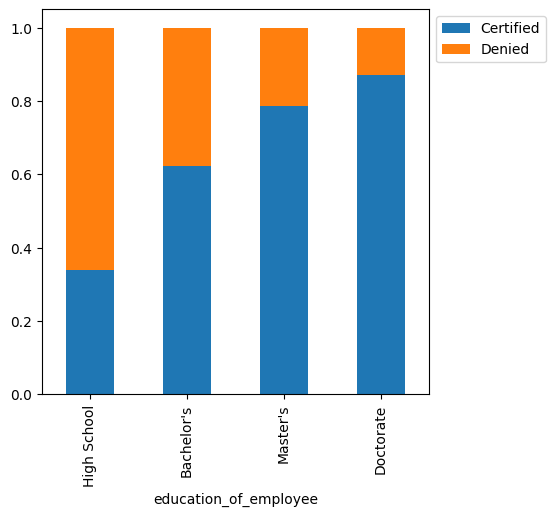

In [41]:
# Case status VS education_of_employee
stacked_barplot(df, 'education_of_employee', 'case_status')

- Yes. Education plays a role in the visa certification. Applicants with higher education level tend to have higher chances of getting visa certified.

2. How does the visa status vary across different continents?

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


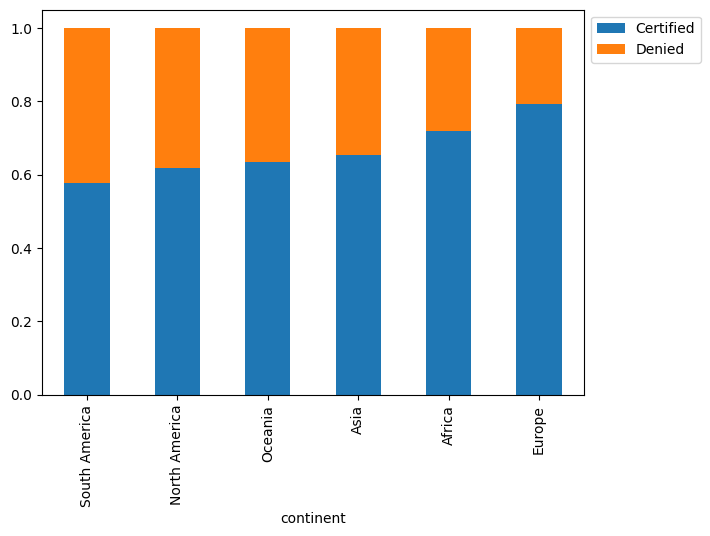

In [42]:
# Case status VS continent
stacked_barplot(df, 'continent', 'case_status')

- In terms of the number of denied case, Asia has the most cases.
- In terms of the fraction of denied cases in all cases, South America has the highest denied fraction compared to other continents, while Europe has the least denied fraction.

3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


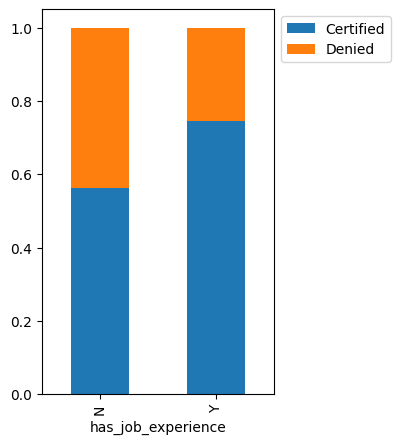

In [43]:
# Case status VS has_job_experience
stacked_barplot(df, 'has_job_experience', 'case_status')

- Yes. Previous work experience can influence the visa status. Applicants with work experience tend to have higher chances of getting visa certified.

4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


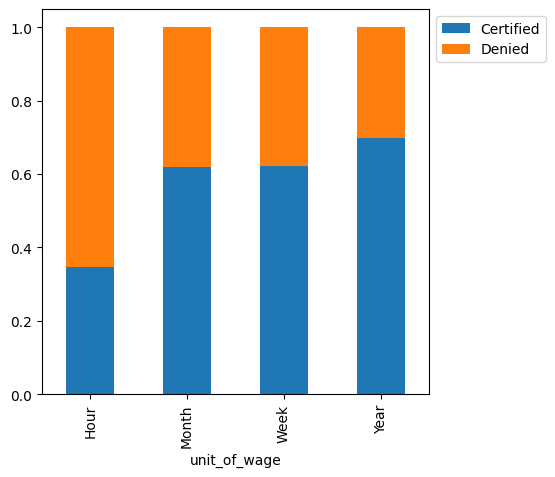

In [44]:
# Case status VS unit_of_wage
stacked_barplot(df, 'unit_of_wage', 'case_status')

- Yearly pay unit is most likely to be certified for a visa.

5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

<Axes: xlabel='case_status', ylabel='prevailing_wage'>

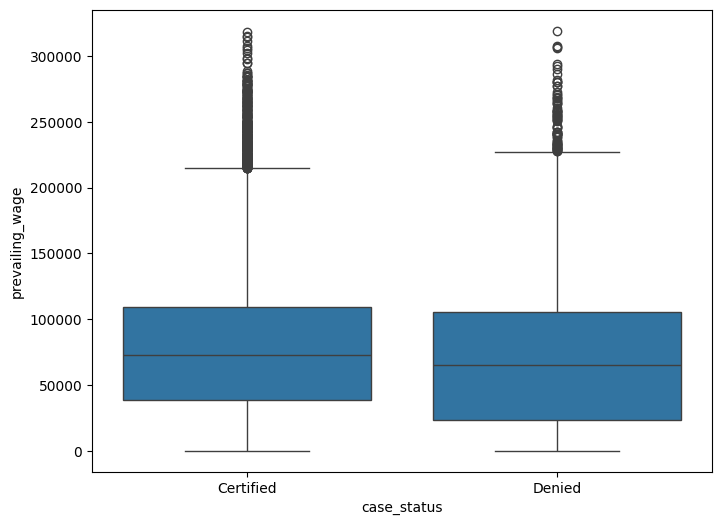

In [45]:
plt.figure(figsize=(8,6))
sns.boxplot(df, x='case_status', y='prevailing_wage')

- The denied visa applications tend to have lower prevailing wages in terms of the 25% percentile, median, and 75% percentile values than the certified visa applications.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [46]:
# Check duplicates
df.nunique()

continent                    6
education_of_employee        4
has_job_experience           2
requires_job_training        2
no_of_employees           7105
yr_of_estab                199
region_of_employment         5
prevailing_wage          25454
unit_of_wage                 4
full_time_position           2
case_status                  2
dtype: int64

- There are duplicated values in all columns, as none of the columns have unique 25480 values.

In [47]:
# Check missing data
df.isnull().sum()

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

- There is no missing data in the dataset.

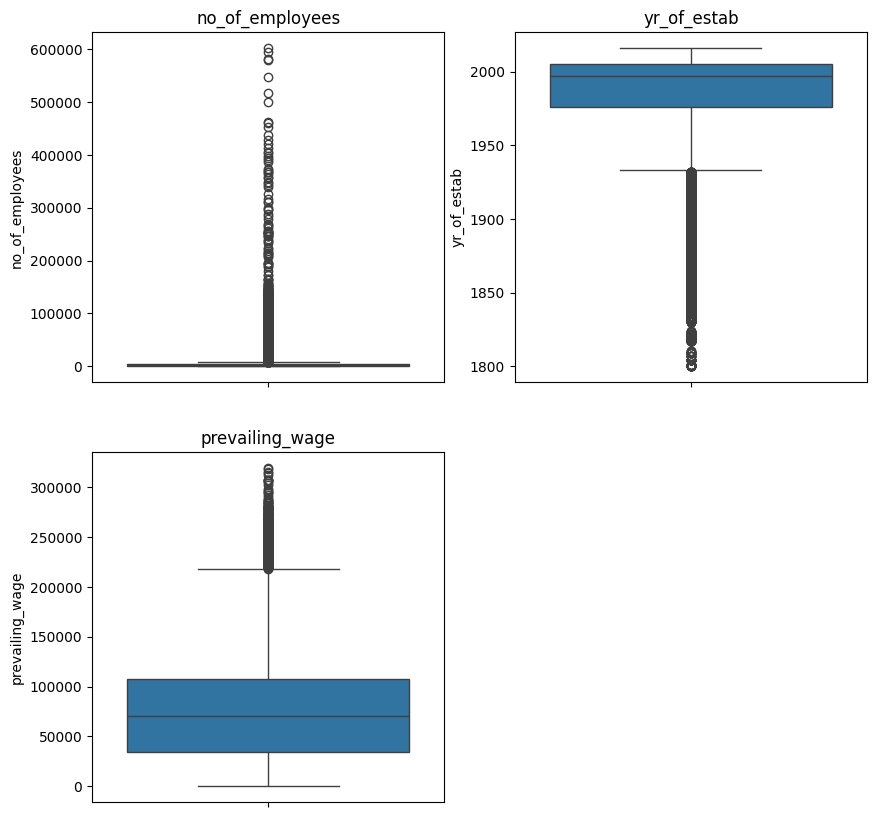

In [48]:
# Check for outliers
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10,10))
for i, variable in enumerate(numeric_columns):
    plt.subplot(2,2,i+1)
    sns.boxplot(df[variable], whis=1.5)
    plt.title(variable)

- There are many outliers in the numerical dataset. The number of employees in the company has negative values, which is strange. We will further check this. However, we won't treat the outliers in yr_of_estab and prevailing_wage.

In [49]:
# Further check negative values for no_of_employees
df[df['no_of_employees'] <= 0]

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
245,Europe,Master's,N,N,-25,1980,Northeast,39452.9900,Year,Y,Certified
378,Asia,Bachelor's,N,Y,-11,2011,Northeast,32506.1400,Year,Y,Denied
832,South America,Master's,Y,N,-17,2002,South,129701.9400,Year,Y,Certified
2918,Asia,Master's,Y,N,-26,2005,Midwest,112799.4600,Year,Y,Certified
6439,Asia,Bachelor's,N,N,-14,2013,South,103.9700,Hour,Y,Denied
6634,Asia,Bachelor's,Y,N,-26,1923,West,5247.3200,Year,Y,Denied
7224,Europe,Doctorate,N,N,-25,1998,Midwest,141435.9500,Year,Y,Certified
7281,Asia,High School,N,N,-14,2000,Midwest,58488.5000,Year,Y,Denied
7318,Asia,Bachelor's,Y,Y,-26,2006,South,115005.6100,Year,Y,Certified
7761,Asia,Master's,N,N,-11,2009,Midwest,38457.5100,Year,Y,Certified


In [50]:
df[df['no_of_employees'] <= 0]['case_status'].count()

33

In [51]:
df[df['no_of_employees'] <= 0].nunique()

continent                 5
education_of_employee     4
has_job_experience        2
requires_job_training     2
no_of_employees           5
yr_of_estab              28
region_of_employment      4
prevailing_wage          33
unit_of_wage              2
full_time_position        2
case_status               2
dtype: int64

- There are 33 data with negative no_of_employees in total. These data exist in all data features. Therefore, it is hard to treat these strange negative values. We will delete these data.

In [52]:
# Delete the data
df = df.drop(df[df['no_of_employees'] <= 0].index, axis=0)

# Check negative values again
df[df['no_of_employees'] <= 0]['case_status'].count()

0

- Now the negative no_of_employees values are removed.

## EDA

- It is a good idea to explore the data once again after manipulating it.

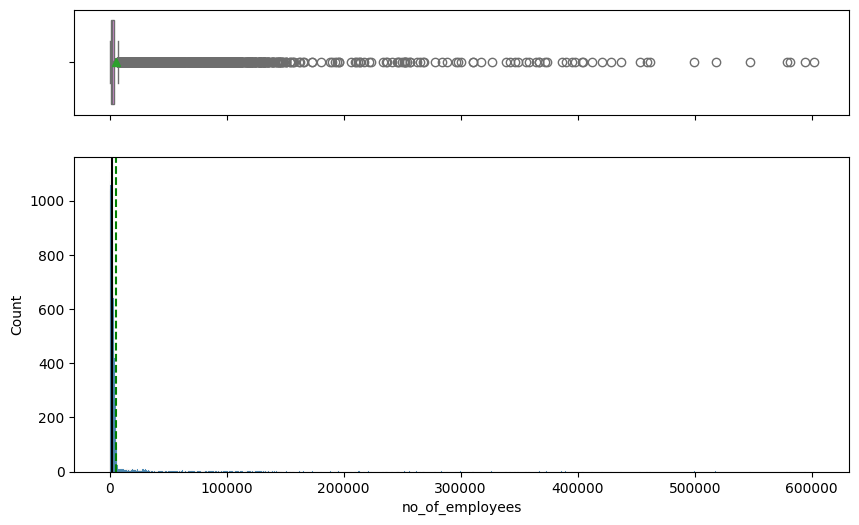

In [53]:
# Check for no_of_employees again
histogram_boxplot(df, 'no_of_employees')

<Axes: xlabel='case_status', ylabel='no_of_employees'>

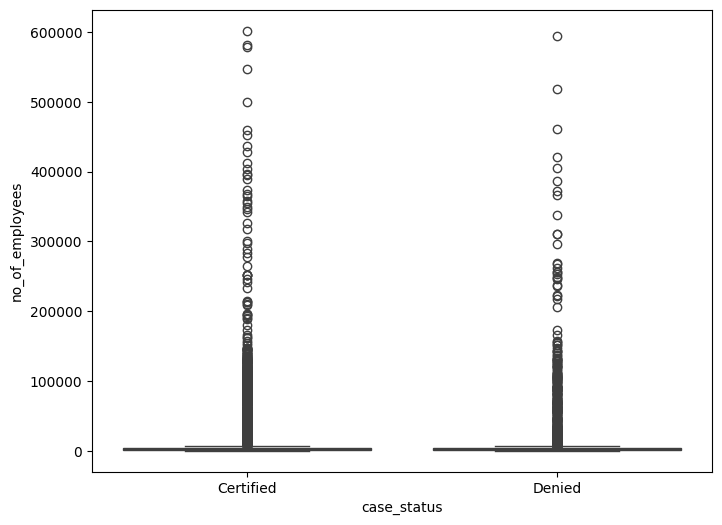

In [54]:
plt.figure(figsize=(8,6))
sns.boxplot(df, x='case_status', y='no_of_employees')

- The data pattern does not change, which is good. Next we will split the data for training.

### Data preparation for training

In [55]:
df = df.replace({'Certified': 1, 'Denied': 0})
y = df['case_status']
X = df.drop(['case_status'], axis=1)

In [56]:
X = pd.get_dummies(X, drop_first=True, dtype=int)

In [57]:
X.head()

,no_of_employees,yr_of_estab,prevailing_wage,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,...,has_job_experience_Y,requires_job_training_Y,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_Y
0,14513,2007,592.2029,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
1,2412,2002,83425.6500,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,1
2,44444,2008,122996.8600,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,1
3,98,1897,83434.0300,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
4,1082,2005,149907.3900,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,1


In [58]:
# Split train, test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
print(X_train.shape, X_test.shape)

(17812, 21) (7635, 21)


In [59]:
# Check whether the y data is balanced
print('Training set: ',y_train.value_counts(1))
print('Test set: ',y_test.value_counts(1))

Training set:  case_status
1    0.668089
0    0.331911
Name: proportion, dtype: float64
Test set:  case_status
1    0.668107
0    0.331893
Name: proportion, dtype: float64


## Building bagging and boosting models

## Model performance evaluation

**Model can make wrong predictions as:**
1. Predicting a visa application denied but the visa is certified.
2. Predicting a visa application certified but the visa is denied.

**Both situations are important because:**
1. If the visa application is predicted to be denied but the visa is certified, the employer may cancel the job offer and the employee may lose his/her job. The company can also suffer from the labor waste during the hiring.
2. If the visa application is predicted to be certified but the visa is denied, the employee can not start his/her job as expected. The company can also suffer from the time waste of waiting for the employee to start his/her job later and the cost waste of reapplication for the visa.

**Therefore, we will evaluate the model performance using f1 score.**



In [60]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [61]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Building bagging models

### Decision Tree Model

In [62]:
dtree = DecisionTreeClassifier(random_state=1, class_weight={1: 0.67, 0: 0.33})
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.33, 1: 0.67}, random_state=1)

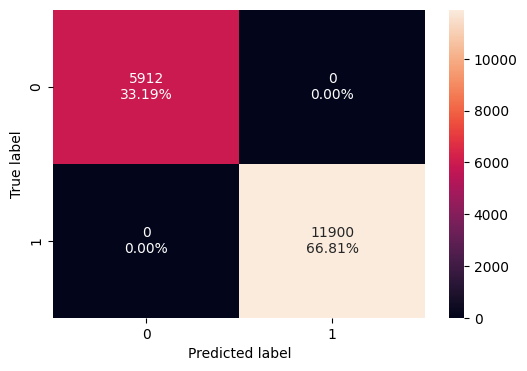

In [63]:
# Check the confusion matrix for training data
confusion_matrix_sklearn(dtree, X_train, y_train)

In [64]:
# Check the model performance score for training data
dtree_model_train_perf = model_performance_classification_sklearn(dtree, X_train, y_train)
print('Training performance:\n',dtree_model_train_perf)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


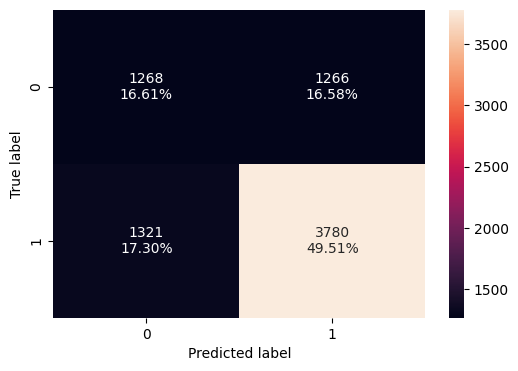

In [65]:
# Check the confusion matrix for test data
confusion_matrix_sklearn(dtree, X_test, y_test)

In [66]:
# Check the model performance score for test data
dtree_model_test_perf = model_performance_classification_sklearn(dtree, X_test, y_test)
print('Test performance:\n', dtree_model_test_perf)

Test performance:
    Accuracy    Recall  Precision        F1
0  0.661166  0.741031   0.749108  0.745048


- The decision tree model works perfect for the training data, but not for the test data. The decision tree model tends to be overfitted.

### Bagging Classifier

In [67]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train, y_train)

BaggingClassifier(random_state=1)

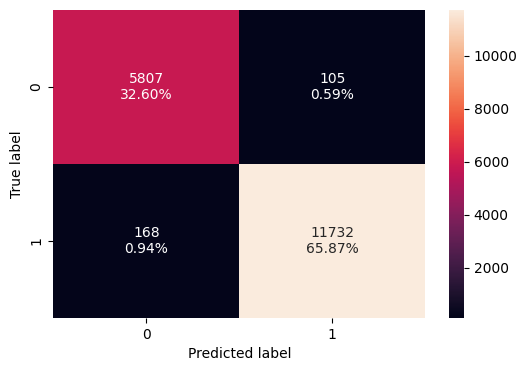

In [68]:
# Check confusion matrix for training data
confusion_matrix_sklearn(bagging, X_train, y_train)

In [69]:
# Check the model performance score for training data
bagging_model_train_perf = model_performance_classification_sklearn(bagging, X_train, y_train)
print('Training performance:\n',bagging_model_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.984673  0.985882    0.99113  0.988499


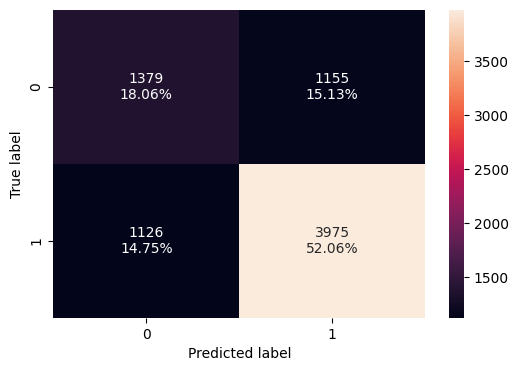

In [70]:
# Check confusion matrix for test data
confusion_matrix_sklearn(bagging, X_test, y_test)

In [71]:
# Check the model performance score for test data
bagging_model_test_perf = model_performance_classification_sklearn(bagging, X_test, y_test)
print('Test performance:\n',bagging_model_test_perf)

Test performance:
    Accuracy    Recall  Precision       F1
0  0.701244  0.779259   0.774854  0.77705


- The bagging classifier works well for the training data, but it performs worse on the test data. It is also overfitted.

### Bagging Classifier with weighted Decision Tree

In [72]:
bagging_wt = BaggingClassifier(random_state=1, base_estimator=DecisionTreeClassifier(class_weight={1: 0.67, 0: 0.33}, random_state=1))
bagging_wt.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.33,
                                                                      1: 0.67},
                                                        random_state=1),
                  random_state=1)

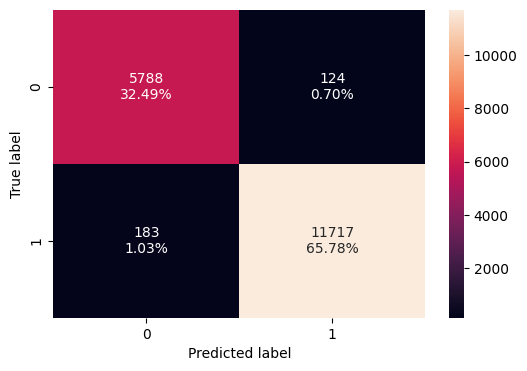

In [73]:
# Check confusion matrix for training data
confusion_matrix_sklearn(bagging_wt, X_train, y_train)

In [74]:
# Check model performance score for training data
bagging_wt_model_train_perf = model_performance_classification_sklearn(bagging_wt, X_train, y_train)
print('Training performance:\n', bagging_wt_model_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.982764  0.984622   0.989528  0.987069


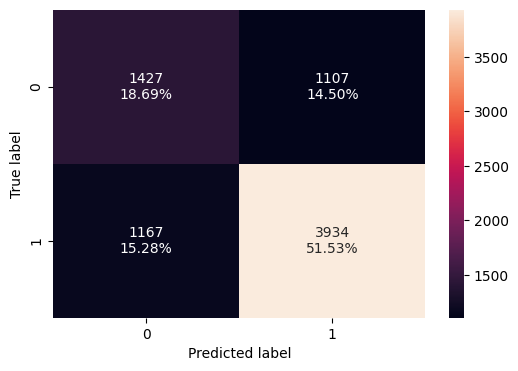

In [75]:
# Check confusion matrix for test data
confusion_matrix_sklearn(bagging_wt, X_test, y_test)

In [76]:
# Check model performance score for test data
bagging_wt_model_test_perf = model_performance_classification_sklearn(bagging_wt, X_test, y_test)
print('Test performance:\n', bagging_wt_model_test_perf)

Test performance:
    Accuracy    Recall  Precision        F1
0  0.702161  0.771221   0.780401  0.775784


- The weighted Bagging Classifier performs slightly worse than the default Bagging Classifier on both training and test data, based on the f1 score.

### Random Forest

In [77]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

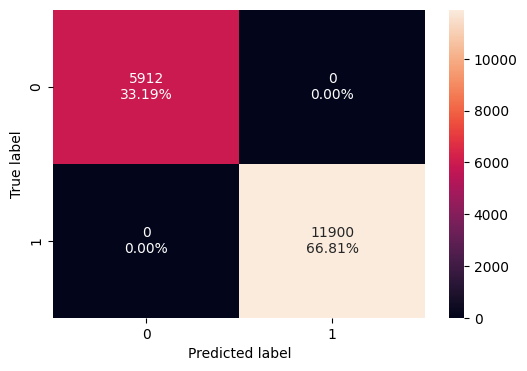

In [78]:
# Check confusion matrix for training data
confusion_matrix_sklearn(rf, X_train, y_train)

In [79]:
# Check model performance score for training data
rf_model_train_perf = model_performance_classification_sklearn(rf, X_train, y_train)
print('Training performance:\n', rf_model_train_perf)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


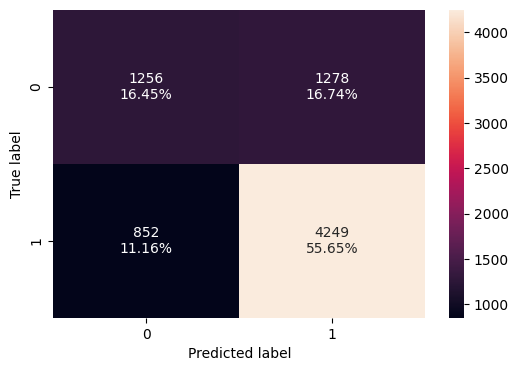

In [80]:
# Check confusion matrix for test data
confusion_matrix_sklearn(rf, X_test, y_test)

In [81]:
# Check model performance score for test data
rf_model_test_perf = model_performance_classification_sklearn(rf, X_test, y_test)
print('Test performance:\n', rf_model_test_perf)

Test performance:
    Accuracy    Recall  Precision        F1
0  0.721022  0.832974   0.768771  0.799586


- The Random Forest Model performs perfect for the training data, but it performs poorly on the test data. Although the Random Forest Model is still overfitted, it tends to perform slightly more generalized than the earlier three models.

### Random Forest with class weight

In [82]:
rf_wt = RandomForestClassifier(random_state=1, class_weight={1: 0.67, 0: 0.33})
rf_wt.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.33, 1: 0.67}, random_state=1)

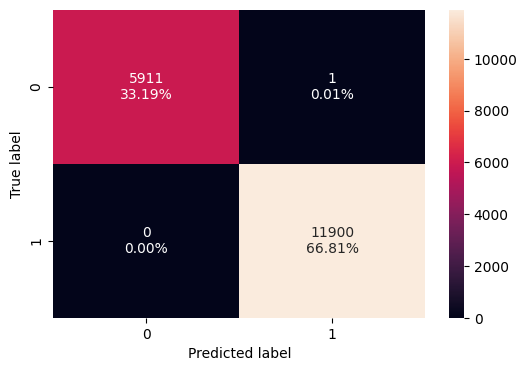

In [83]:
# Check confusion matrix on training data
confusion_matrix_sklearn(rf_wt, X_train, y_train)

In [84]:
# Check model performance score on training data
rf_wt_model_train_perf = model_performance_classification_sklearn(rf_wt, X_train, y_train)
print('Training performance:\n', rf_wt_model_train_perf)

Training performance:
    Accuracy  Recall  Precision        F1
0  0.999944     1.0   0.999916  0.999958


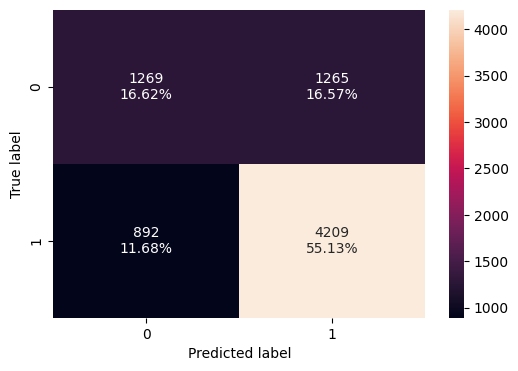

In [85]:
# Check confusion matrix on test data
confusion_matrix_sklearn(rf_wt, X_test, y_test)

In [86]:
# Check model performance score on test data
rf_wt_model_test_perf = model_performance_classification_sklearn(rf_wt, X_test, y_test)
print('Test performance:\n', rf_wt_model_test_perf)

Test performance:
    Accuracy    Recall  Precision        F1
0  0.717485  0.825132   0.768908  0.796028


- The class weighed Random Forest model is slightly degraded compared to the default Random Forest model for both training and test data.

## Hyperparameter Tuning for Bagging Models

### Tuning for Decision Tree Model

In [87]:
# Choose the classifier
dtree_tuned = DecisionTreeClassifier(random_state=1, class_weight={1: 0.67, 0: 0.33})

# Grid of parameters to choose from
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

# Type of score to evaluate model performance
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, param_grid, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Get the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best model
dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.33, 1: 0.67}, max_depth=3,
                       max_leaf_nodes=10, min_impurity_decrease=0.0001,
                       random_state=1)

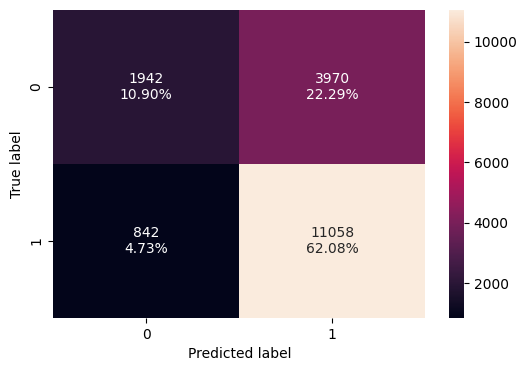

In [88]:
# Check confusion matrix for training data
confusion_matrix_sklearn(dtree_tuned, X_train, y_train)

In [89]:
# Check model performance score for training data
dtree_tuned_train_perf = model_performance_classification_sklearn(dtree_tuned, X_train, y_train)
print('Training performance:\n', dtree_tuned_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.729845  0.929244   0.735826  0.821301


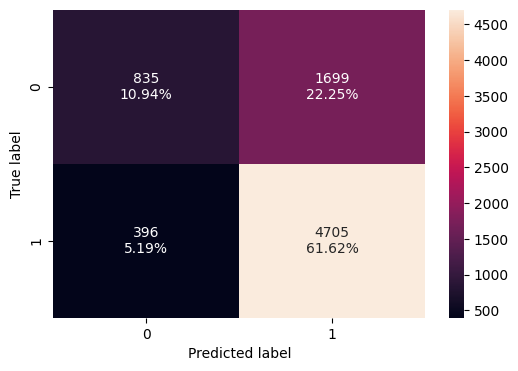

In [90]:
# Check confusion matrix for test data
confusion_matrix_sklearn(dtree_tuned, X_test, y_test)

In [91]:
# Check model performance score for test data
dtree_tuned_test_perf = model_performance_classification_sklearn(dtree_tuned, X_test, y_test)
print('Test performance:\n', dtree_tuned_test_perf)

Test performance:
    Accuracy    Recall  Precision        F1
0  0.725606  0.922368   0.734697  0.817905


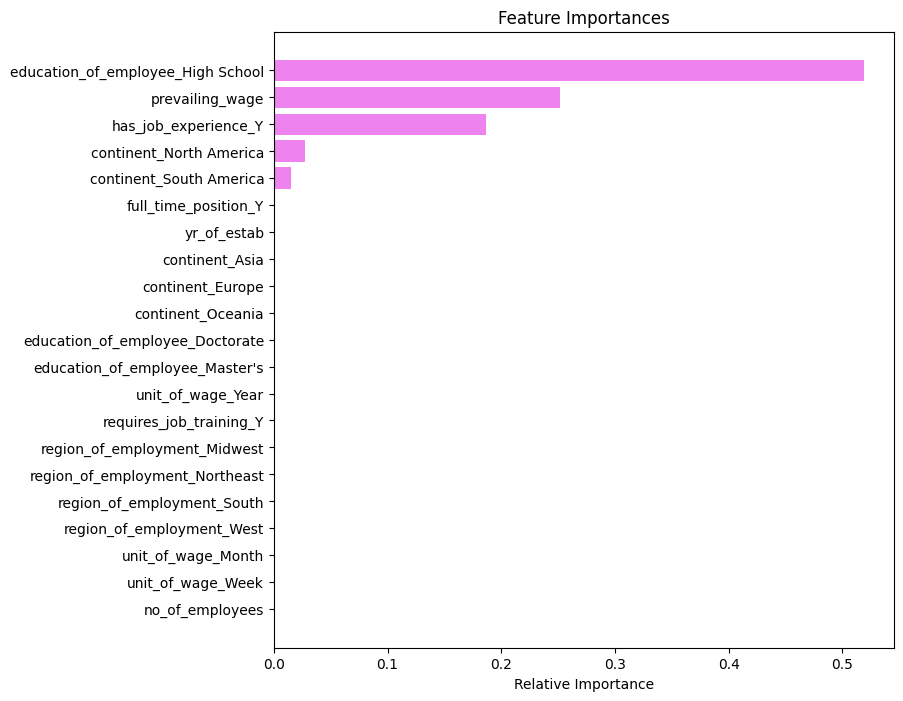

In [92]:
feature_names = X_train.columns
importances = dtree_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- The hyperparameter tuned decision tree model is more generalized on both training and test data now, and the model performs reasonably well.

### Tuning for Bagging Classifier

In [93]:
# Choose the classifier. Since adding weight does not improve the model in the earlier check, we do not include weight here.
bagging_tuned = BaggingClassifier(random_state=1)

# grid search for bagging classifier
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

# Type of score to evaluate model performance
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_tuned, param_grid, scoring=scorer, cv=5)
grid_obj.fit(X_train, y_train)

# Get the best combination of parameters
bagging_tuned = grid_obj.best_estimator_

# Fit the best model
bagging_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.8, n_estimators=70,
                  random_state=1)

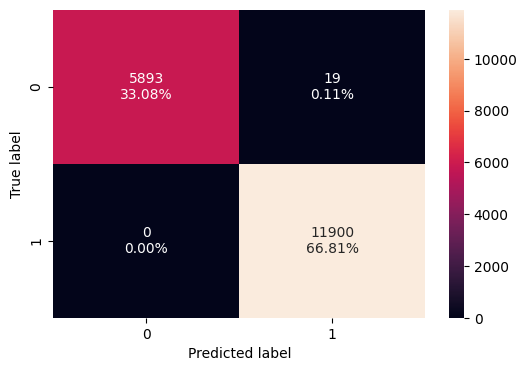

In [94]:
# Check confusion matrix for training data
confusion_matrix_sklearn(bagging_tuned, X_train, y_train)

In [95]:
# Check model performance score for training data
bagging_tuned_train_perf = model_performance_classification_sklearn(bagging_tuned, X_train, y_train)
print('Training performance:\n', bagging_tuned_train_perf)

Training performance:
    Accuracy  Recall  Precision        F1
0  0.998933     1.0   0.998406  0.999202


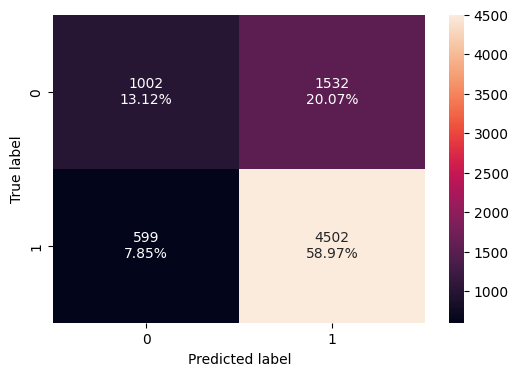

In [96]:
# Check confusion matrix for test data
confusion_matrix_sklearn(bagging_tuned, X_test, y_test)

In [97]:
# Check model performance score for test data
bagging_tuned_test_perf = model_performance_classification_sklearn(bagging_tuned, X_test, y_test)
print('Test performance:\n', bagging_tuned_test_perf)

Test performance:
    Accuracy    Recall  Precision        F1
0  0.720891  0.882572   0.746105  0.808621


- The f1 score for hyperparameter tuned bagging classifier model is better for the test data compared to the non-tuned model. Therefore, hyperparameter tuning helps to improve the generalizatio of bagging classifier model. However, the hyperparameter tuned bagging classifier model remains overfitting.

### Tuning for Random Forest Model

In [98]:
# Choose the classifier. Since adding weight does not improve the model in the earlier check, we do not include weight here.
rf_tuned = RandomForestClassifier(random_state=1)

# grid search for random forest model
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

# Type of score to evaluate model performance
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, param_grid, scoring=scorer, cv=5)
grid_obj.fit(X_train, y_train)

# Get the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best model
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.4, min_samples_leaf=3, n_estimators=110,
                       random_state=1)

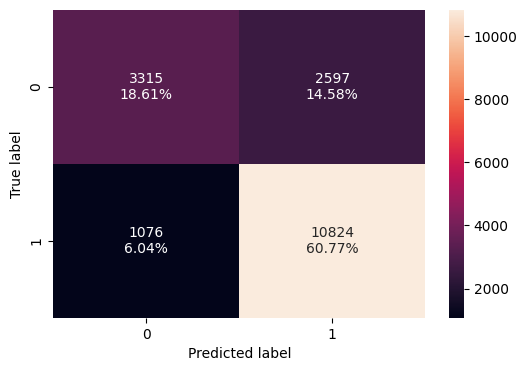

In [99]:
# Check confusion matrix for training data
confusion_matrix_sklearn(rf_tuned, X_train, y_train)

In [100]:
# Check model performance score for training data
rf_tuned_train_perf = model_performance_classification_sklearn(rf_tuned, X_train, y_train)
print('Training performance:\n', rf_tuned_train_perf)

Training performance:
    Accuracy   Recall  Precision        F1
0  0.793791  0.90958   0.806497  0.854943


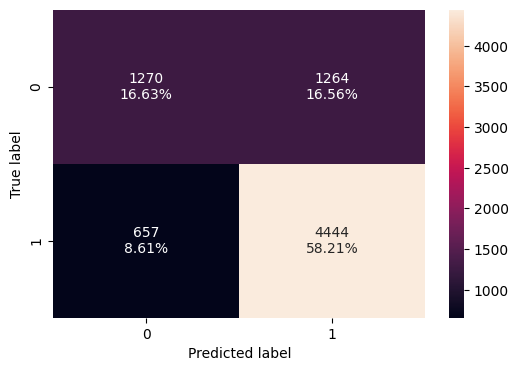

In [101]:
# Check confusion matrix for test data
confusion_matrix_sklearn(rf_tuned, X_test, y_test)

In [102]:
# Check model performance score for test data
rf_tuned_test_perf = model_performance_classification_sklearn(rf_tuned, X_test, y_test)
print('Test performance:\n', rf_tuned_test_perf)

Test performance:
    Accuracy    Recall  Precision        F1
0  0.748396  0.871202   0.778556  0.822278


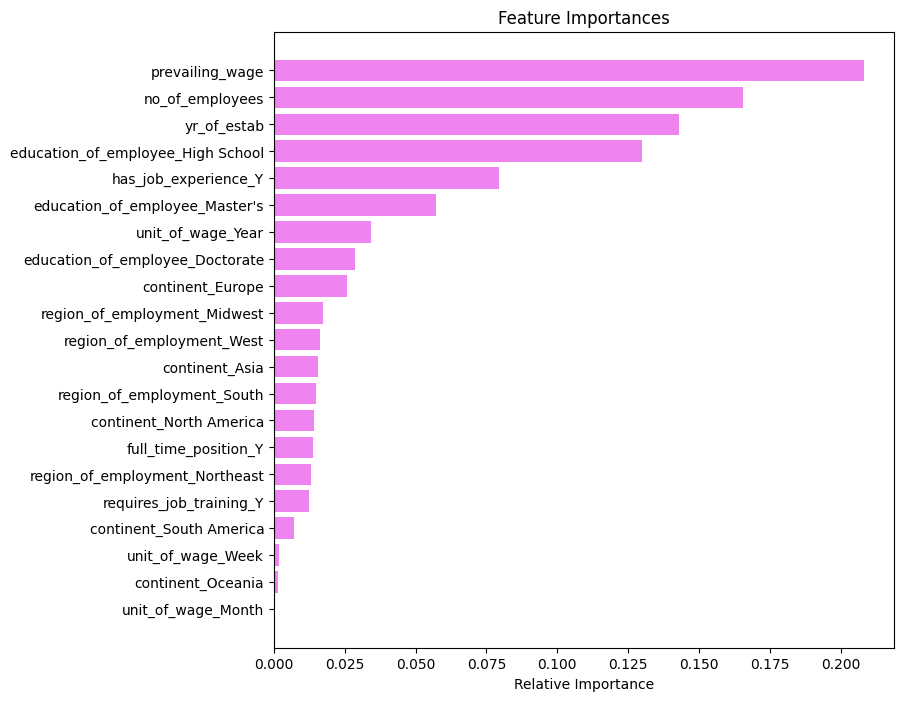

In [103]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- The hyperparameter tuned random forest model becomes more generalized on both training and test data compared to the non-tuned random forest model. The model performs reasonably on both training and test data.

## Building boosting model

### Adaboost Classifier

In [104]:
# Choose the classifier
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

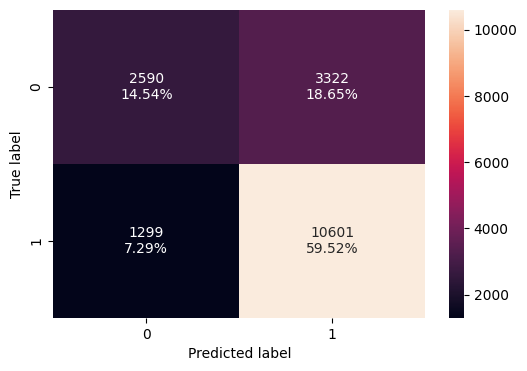

In [105]:
# Check confusion matrix on training data
confusion_matrix_sklearn(ab_classifier, X_train, y_train)

In [106]:
# Check model performance score on training data
ab_classifier_model_train_perf = model_performance_classification_sklearn(ab_classifier, X_train, y_train)
print('Training performance:\n', ab_classifier_model_train_perf)

Training performance:
    Accuracy   Recall  Precision        F1
0  0.740568  0.89084   0.761402  0.821051


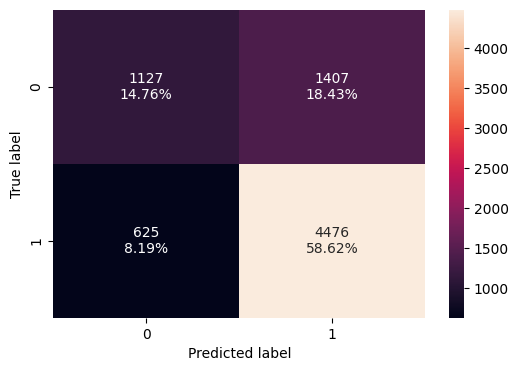

In [107]:
# Check confusion matrix on test data
confusion_matrix_sklearn(ab_classifier, X_test, y_test)

In [108]:
# Check model performance score on test data
ab_classifier_model_test_perf = model_performance_classification_sklearn(ab_classifier, X_test, y_test)
print('Test performance:\n', ab_classifier_model_test_perf)

Test performance:
    Accuracy    Recall  Precision        F1
0  0.733857  0.877475   0.760836  0.815004


- The AdaBoost model performs reasonably for both training and test data based on the f1 score. The model is generalized on both training and test datasets.

### Gradient Boosting Classifier

In [109]:
# Choose the classifier
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

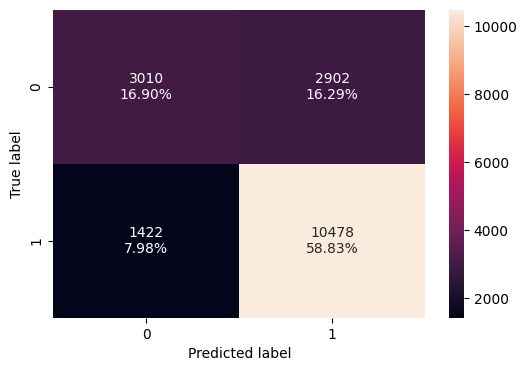

In [110]:
# Check confusion matrix on training data
confusion_matrix_sklearn(gb_classifier, X_train, y_train)

In [111]:
# Check model performance score on training data
gb_classifier_model_train_perf = model_performance_classification_sklearn(gb_classifier, X_train, y_train)
print('Training performance:\n', gb_classifier_model_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.757242  0.880504   0.783109  0.828956


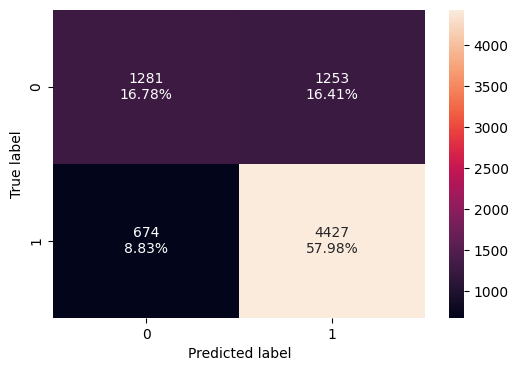

In [112]:
# Check confusion matrix on test data
confusion_matrix_sklearn(gb_classifier, X_test, y_test)

In [113]:
# Check model performance score on test data
gb_classifier_model_test_perf = model_performance_classification_sklearn(gb_classifier, X_test, y_test)
print('Test performance:\n', gb_classifier_model_test_perf)

Test performance:
    Accuracy    Recall  Precision       F1
0   0.74761  0.867869   0.779401  0.82126


- The Gradient Boosting Model also performs well on both training and test data.

### XGBoost Classifier

In [114]:
# Choose the classifier
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

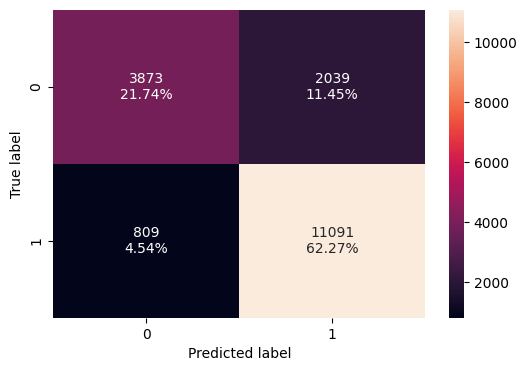

In [115]:
# Check confusion matrix on training data
confusion_matrix_sklearn(xgb_classifier, X_train, y_train)

In [116]:
# Check model performance score on training data
xgb_classifier_model_train_perf = model_performance_classification_sklearn(xgb_classifier, X_train, y_train)
print('Training performance:\n', xgb_classifier_model_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.840108  0.932017   0.844707  0.886217


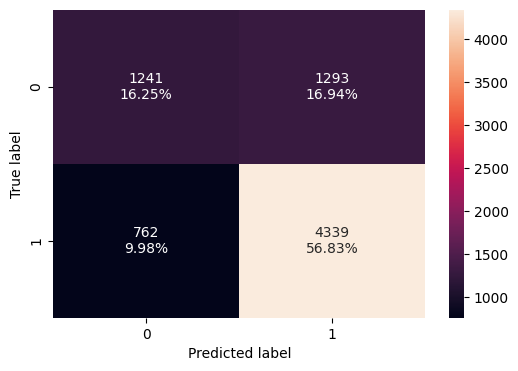

In [117]:
# Check confusion matrix on test data
confusion_matrix_sklearn(xgb_classifier, X_test, y_test)

In [118]:
# Check model performance score on test data
xgb_classifier_model_test_perf = model_performance_classification_sklearn(xgb_classifier, X_test, y_test)
print('Test performance:\n', xgb_classifier_model_test_perf)

Test performance:
    Accuracy    Recall  Precision        F1
0  0.730845  0.850618   0.770419  0.808534


- The XGBoost model tends to be slightly overfitted as the f1 score on test data is lower than the training data.

## Hyperparameter Tuning for boosting models

### Tuning for AdaBoost model

In [119]:
# Choose the classifer
ab_tuned = AdaBoostClassifier(random_state=1)

# grid search for AdaBoost
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of score to evaluate model performance
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(ab_tuned, param_grid, scoring=scorer, cv=5)
grid_obj.fit(X_train, y_train)

# Get the best combination of parameters
ab_tuned = grid_obj.best_estimator_

# Fit the best model
ab_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.05, n_estimators=100, random_state=1)

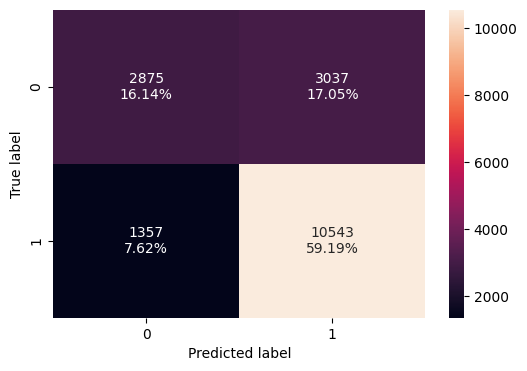

In [120]:
# Check confusion matrix on training data
confusion_matrix_sklearn(ab_tuned, X_train, y_train)

In [121]:
# Check model performance score on training data
ab_tuned_model_train_perf = model_performance_classification_sklearn(ab_tuned, X_train, y_train)
print('Training performance:\n', ab_tuned_model_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.753312  0.885966   0.776362  0.827551


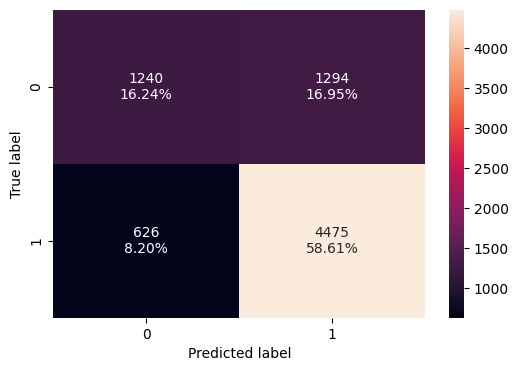

In [122]:
# Check confusion matrix on test data
confusion_matrix_sklearn(ab_tuned, X_test, y_test)

In [123]:
# Check model performance score on test data
ab_tuned_model_test_perf = model_performance_classification_sklearn(ab_tuned, X_test, y_test)
print('Training performance:\n', ab_tuned_model_test_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.748527  0.877279   0.775698  0.823367


- The hyperparameter tuning for AdaBoost Model slightly improves the model performance on both training and test data by improving the accuracy and f1 score. The hyperparameter tuned AdaBoost model also improves the model generalization on test data by increasing the f1 score.

### Tuning for Gradient Boosting Model

In [124]:
# Choose the classifier
gb_tuned = GradientBoostingClassifier(random_state=1)

# grid scearch for GBM
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of score to evaluate model performance
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gb_tuned, param_grid, scoring=scorer, cv=5)
grid_obj.fit(X_train, y_train)

# Get the best combination of parameters
gb_tuned = grid_obj.best_estimator_

# Fit the model
gb_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, random_state=1, subsample=0.9)

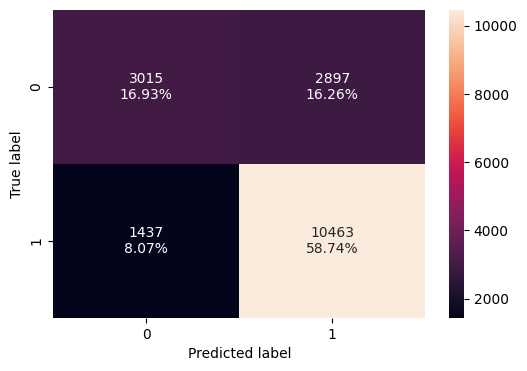

In [125]:
# Check confusion matrix on training data
confusion_matrix_sklearn(gb_tuned, X_train, y_train)

In [126]:
# Check model performance score on training data
gb_tuned_model_train_perf = model_performance_classification_sklearn(gb_tuned, X_train, y_train)
print('Training performance:\n', gb_tuned_model_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.756681  0.879244   0.783159  0.828424


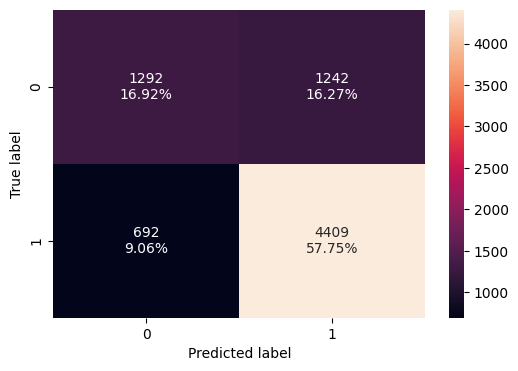

In [127]:
# Check confusion matrix on test data
confusion_matrix_sklearn(gb_tuned, X_test, y_test)

In [128]:
# Check model performance score on test data
gb_tuned_model_test_perf = model_performance_classification_sklearn(gb_tuned, X_test, y_test)
print('Training performance:\n', gb_tuned_model_test_perf)

Training performance:
    Accuracy   Recall  Precision        F1
0  0.746693  0.86434   0.780216  0.820126


- The hyperparameter tuned Gradient Boosting Model performs similarly as the non-tuned Gradient Boosting Model. It is also generalized on both training and test model.

### Tuning for XGBoost Model

In [129]:
# Choose the classifier
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# grid scearch for XGBoost
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}

# Type of score to evaluate model performance
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, param_grid, scoring=scorer, cv=5)
grid_obj.fit(X_train, y_train)

# Get the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the model
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

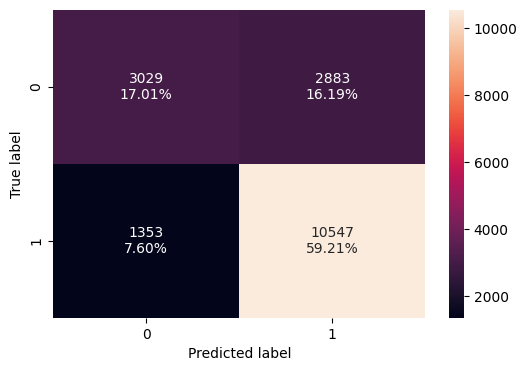

In [130]:
# Check confusion matrix on training data
confusion_matrix_sklearn(xgb_tuned, X_train, y_train)

In [131]:
# Check model performance score on training data
xgb_tuned_model_train_perf = model_performance_classification_sklearn(xgb_tuned, X_train, y_train)
print('Training performance:\n', xgb_tuned_model_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.762183  0.886303   0.785331  0.832767


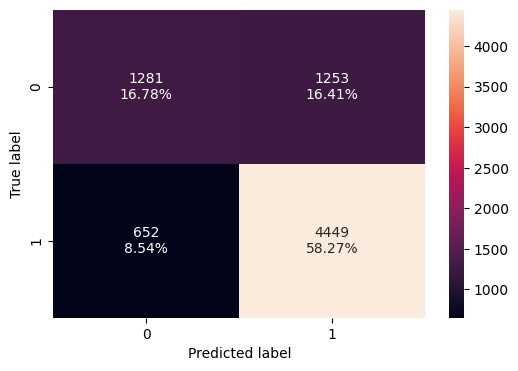

In [132]:
# Check confusion matrix on test data
confusion_matrix_sklearn(xgb_tuned, X_test, y_test)

In [133]:
# Check model performance score on test data
xgb_tuned_model_test_perf = model_performance_classification_sklearn(xgb_tuned, X_test, y_test)
print('Training performance:\n', xgb_tuned_model_test_perf)

Training performance:
    Accuracy    Recall  Precision       F1
0  0.750491  0.872182   0.780253  0.82366


- The hyperparameter tuned XGBoost model performs slightly worse on the training data compared to the non-tuned model. But the tuned XGBoot model is more generalized on both training and test data.

### Stacking Model

In [134]:
# We will build a stacking model with hyperparameter tuned models: decision tree, random forest, gradient boosting,
# then use the XGBoost to make a final prediction.
estimators = [('Decision Tree', dtree_tuned), ('Random Forest', rf_tuned),
              ('Gradient Boosting', gb_tuned)]
final_estimator = xgb_tuned

stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

stacking_classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('Decision Tree',
                                DecisionTreeClassifier(class_weight={0: 0.33,
                                                                     1: 0.67},
                                                       max_depth=3,
                                                       max_leaf_nodes=10,
                                                       min_impurity_decrease=0.0001,
                                                       random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_samples=0.4,
                                                       min_samples_leaf=3,
                                                       n_estimators=110,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassif...
                                                 feature_types=None, gamma=1,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.05,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=50, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=1, ...))

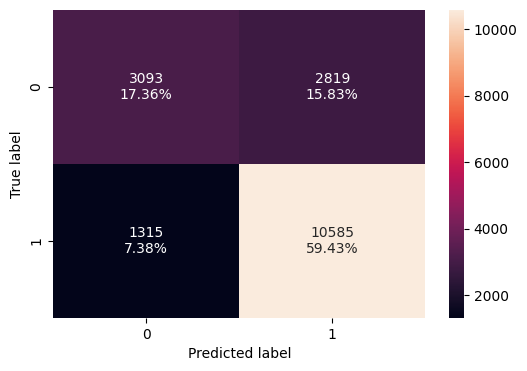

In [135]:
# Check confusion matrix on training data
confusion_matrix_sklearn(stacking_classifier, X_train, y_train)

In [136]:
# Check model performance score on training data
stacking_classifier_model_train_perf = model_performance_classification_sklearn(stacking_classifier, X_train, y_train)
print('Training performance:\n', stacking_classifier_model_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.767909  0.889496    0.78969  0.836627


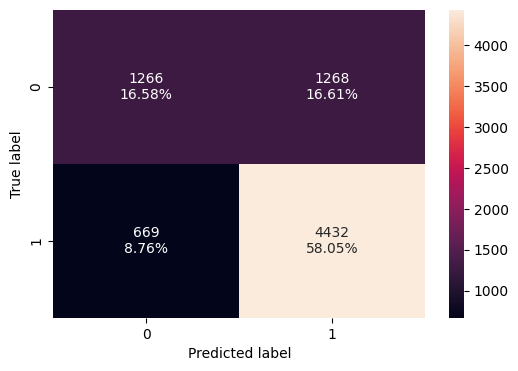

In [137]:
# Check confusion matrix on test data
confusion_matrix_sklearn(stacking_classifier, X_test, y_test)

In [138]:
# Check model performance score on test data
stacking_classifier_model_test_perf = model_performance_classification_sklearn(stacking_classifier, X_test, y_test)
print('Training performance:\n', stacking_classifier_model_test_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0    0.7463  0.868849   0.777544  0.820665


- The stacking model performs well on both training data and test data. Althought the f1 score on test data is slightly lower than the training data, it is still relatively generalized on both training and test data.

## Model Performance Comparison and Conclusions

In [139]:
# Comparison of training data
models_train_comp_df = pd.concat(
    [dtree_model_train_perf.T, dtree_tuned_train_perf.T,
     bagging_model_train_perf.T, bagging_wt_model_train_perf.T, bagging_tuned_train_perf.T,
     rf_model_train_perf.T, rf_wt_model_train_perf.T, rf_tuned_train_perf.T,
     ab_classifier_model_train_perf.T, ab_tuned_model_train_perf.T,
     gb_classifier_model_train_perf.T, gb_tuned_model_train_perf.T,
     xgb_classifier_model_train_perf.T, xgb_tuned_model_train_perf.T,
     stacking_classifier_model_train_perf.T], axis=1)

models_train_comp_df.columns = [
    'Decision Tree', 'Decision Tree Tuned',
    'Bagging Classifer', 'Bagging Classifier with class weight', 'Bagging Classifier Tuned',
    'Random Forest', 'Random Forest with class weight', 'Random Forest Tuned',
    'AdaBoost Model', 'AdaBoost Model Tuned',
    'Gradient Boosting Model', 'Gradient Boosting Model Tuned',
    'XGBoost Model', 'XGBoost Model Tuned',
    'Stacking Model'
]

print('Model performance comparision on training data')
models_train_comp_df.T

Model performance comparision on training data


,Accuracy,Recall,Precision,F1
Decision Tree,1.000000,1.000000,1.000000,1.000000
Decision Tree Tuned,0.729845,0.929244,0.735826,0.821301
Bagging Classifer,0.984673,0.985882,0.991130,0.988499
Bagging Classifier with class weight,0.982764,0.984622,0.989528,0.987069
Bagging Classifier Tuned,0.998933,1.000000,0.998406,0.999202
Random Forest,1.000000,1.000000,1.000000,1.000000
Random Forest with class weight,0.999944,1.000000,0.999916,0.999958
Random Forest Tuned,0.793791,0.909580,0.806497,0.854943
AdaBoost Model,0.740568,0.890840,0.761402,0.821051
AdaBoost Model Tuned,0.753312,0.885966,0.776362,0.827551


In [140]:
# Comparison of test data
models_test_comp_df = pd.concat(
    [dtree_model_test_perf.T, dtree_tuned_test_perf.T,
     bagging_model_test_perf.T, bagging_wt_model_test_perf.T, bagging_tuned_test_perf.T,
     rf_model_test_perf.T, rf_wt_model_test_perf.T, rf_tuned_test_perf.T,
     ab_classifier_model_test_perf.T, ab_tuned_model_test_perf.T,
     gb_classifier_model_test_perf.T, gb_tuned_model_test_perf.T,
     xgb_classifier_model_test_perf.T, xgb_tuned_model_test_perf.T,
     stacking_classifier_model_test_perf.T], axis=1)

models_test_comp_df.columns = [
    'Decision Tree', 'Decision Tree Tuned',
    'Bagging Classifer', 'Bagging Classifier with class weight', 'Bagging Classifier Tuned',
    'Random Forest', 'Random Forest with class weight', 'Random Forest Tuned',
    'AdaBoost Model', 'AdaBoost Model Tuned',
    'Gradient Boosting Model', 'Gradient Boosting Model Tuned',
    'XGBoost Model', 'XGBoost Model Tuned',
    'Stacking Model'
]

print('Model performance comparision on test data')
models_test_comp_df.T

Model performance comparision on test data


,Accuracy,Recall,Precision,F1
Decision Tree,0.661166,0.741031,0.749108,0.745048
Decision Tree Tuned,0.725606,0.922368,0.734697,0.817905
Bagging Classifer,0.701244,0.779259,0.774854,0.777050
Bagging Classifier with class weight,0.702161,0.771221,0.780401,0.775784
Bagging Classifier Tuned,0.720891,0.882572,0.746105,0.808621
Random Forest,0.721022,0.832974,0.768771,0.799586
Random Forest with class weight,0.717485,0.825132,0.768908,0.796028
Random Forest Tuned,0.748396,0.871202,0.778556,0.822278
AdaBoost Model,0.733857,0.877475,0.760836,0.815004
AdaBoost Model Tuned,0.748527,0.877279,0.775698,0.823367


### Will tuning the hyperparameters improve the model performance?

- In general, hyperparameter tuning helps to improve the model performance. This is true for the Decision Tree, Bagging Classifier, Random Forest, AdaBoost Model, and XGBoost Model. Either the f1 score is improved or the model becomes more generalized after the tuning. On the other hand, tuning for Gradient Boosting Model does not improve the model performance.

### Summary of the model performance

**1. Comparing all the models, tuned AdaBoost model, gradient boosting model, tuned XGBoost model, and stacking model all have the generalized performance on both training data and test data. The f1 scores on the test data from these four models are around 0.82, and the f1 scores on the training data range from 0.828 to 0.837.**

**2. In terms of the model performance of accuracy, all these four models also perform quite similarly. Stacking model has the highest accuracy score on training data but it is slightly overfitted since the difference of accuracy score between training and test data is slightly larger than the rest three models. The tuned XGBoost model has the second highest accuracy score on training data and the accuracy on test data is the highest among all four models. Therefore, we select the tuned XGBoost model as our final prediction model.**

### Check the feature importance of our final model

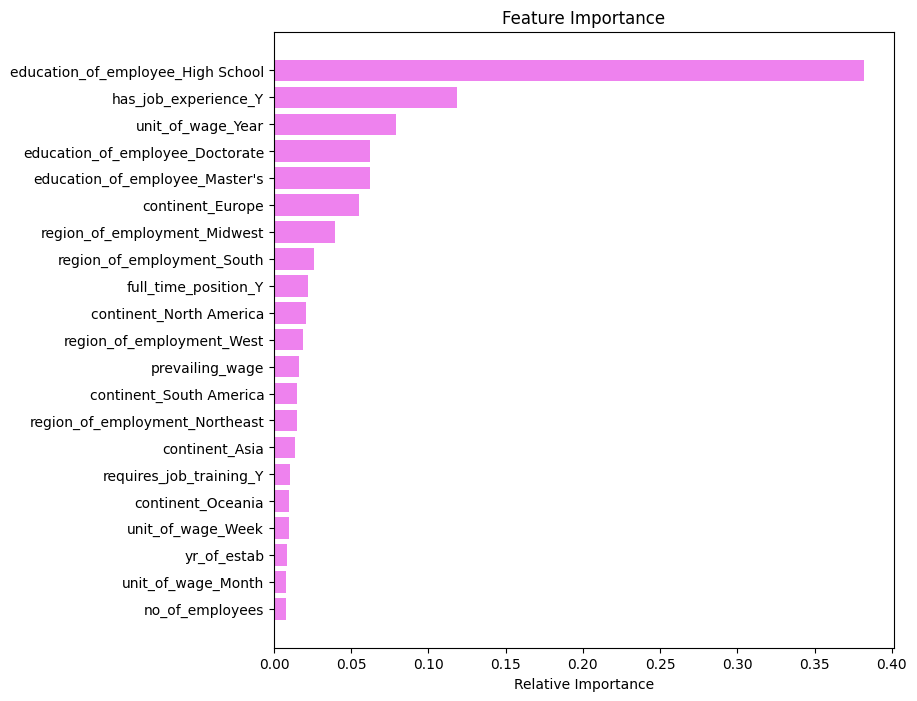

In [141]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8,8))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- In the tuned XGBoost model, high school education level, having job experience, wage unit in year, ranks the top three important features in impacting the visa case status.

## Actionable Insights and Recommendations

Facilitate the process of visa approvals.

Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

- Through the analysis of available dataset, we find that a few factors can largely influence the visa status. For example:
  1. Applicants with higher education levels tend to have higher chances of getting visa certified.
  2. Applicants with work experience tend to have higher chances of getting visa certified.
  3. Applicants with yearly paid and higher prevailing wage also have higher chances of getting certified visa.
  4. Employment in the South and Midwest regions tends to have higher certified chances of applicant visa.
- We have built a few models to predict the visa approval status based on the applicants' profiles. Among all the models, the hyperparameter tuned XGBoost model is selected as our final model. This XGBoost model can have a generalized performance on both training and test data, which have the f1 score of 0.83 and 0.82 and accuracy score of 0.76 and 0.75 for training and test data, respectively.
- By using this XGBoost model, we find that the education_of_employee_high_school, has_job_experience_Y, unit_of_wage_year rank the top three important features in influencing the visa status. Among the top five important features, education level and working experience are the most important factors in affecting the visa application status.
- For future visa applications, applicants who have low education level (e.g., high school degree) and no previous working experience may have the larger probability of getting visa application denied. On the other hand, applicants with higher education levels (e.g., Master's and Doctorate degree) and with previous working experience can have larger probability of getting visa certified. Meanwhile, if the company would like to increase the visa ceritification chance, they should also offer more annual salary based positions. Hiring employees from Europe may also facilitate the visa approval process.

In [142]:
%%shell
jupyter nbconvert --to html '/content/drive/MyDrive/Colab Notebooks/Ensemble Technique/Project 5/DSBA_Project_ET_EasyVisa_Fullcode_MZ.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Ensemble Technique/Project 5/DSBA_Project_ET_EasyVisa_Fullcode_MZ.ipynb to html
[NbConvertApp] Writing 3178233 bytes to /content/drive/MyDrive/Colab Notebooks/Ensemble Technique/Project 5/DSBA_Project_ET_EasyVisa_Fullcode_MZ.html
